Troy Morgan  
Week 9 Independent Lab  
BGEN 632, Graduate Introduction to Python  
Submitted 

Independent Lab: Inferential Statistics

# Notebook Setup

In [2]:
# load modules
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts # for QQ plot
from scipy.stats import pearsonr # correlation p-values
from sklearn.linear_model import LinearRegression # regression output
import statsmodels.formula.api as smf # ols regression

In [3]:
# Set working directory
os.chdir("\\Users\\troy.morgan\\Documents\\GitHub\\week9labs/data")  # change this to your filepath
os.getcwd()  # confirm change

'C:\\Users\\troy.morgan\\Documents\\GitHub\\week9labs\\data'

In [30]:
# Load data and do a quick inspection. 
ect_data = pd.read_table("ect_data.txt", delimiter='\t')
ect_data

,attitude1_01,attitude1_02,attitude1_03,attitude1_04,intent1_01,intent1_02,intent1_03,intent1_04,peruse01,peruse02,peruse03,peruse04,satis01,satis02,satis03,satis04
0,6,6,6,6,6,6,6,6,6,4,5,5,5,5,5,5
1,7,7,7,7,7,7,7,7,7,7,7,7,7,6,6,6
2,6,6,6,6,7,7,7,7,6,5,5,5,5,5,5,5
3,7,7,7,7,6,6,7,6,5,5,5,5,7,6,7,6
4,7,7,6,6,7,7,7,6,6,6,7,7,6,6,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,6,6,6,7,7,6,7,6,6,5,5,5,6,6,6,5
197,5,6,6,6,7,7,7,7,7,7,6,6,6,4,4,6
198,6,5,6,6,5,6,6,5,6,5,6,5,5,5,6,5
199,6,6,6,6,6,7,6,6,6,6,7,7,5,5,6,5


# Linear and Multiple Regression

Using `intent1_01` as the target variable, create a regression model using only 5 of the other numerical variables.
Do not include `intent1_02`, `intent1_03`, and `intent1_04` as independent variables.

I will use attitude1_01, attitude1_02, attitude1_03, attitude1_04, and satis01. 

Are these likert scale answers on a survey?

## Assess the validity of the assumptions of linearity...

<Axes: xlabel='attitude1_01', ylabel='intent1_01'>

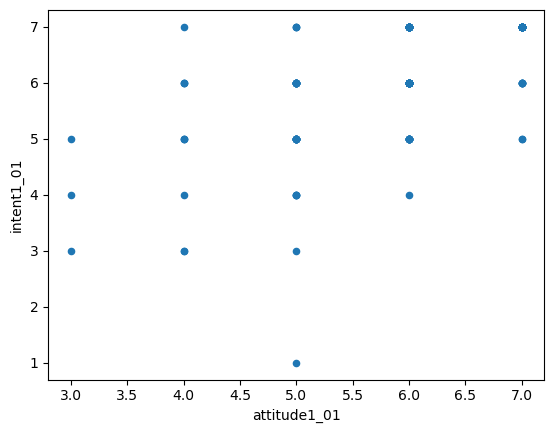

In [5]:
#Scatterplot with first variable.
ect_data.plot.scatter(x='attitude1_01', y='intent1_01')

<Axes: xlabel='attitude1_02', ylabel='intent1_01'>

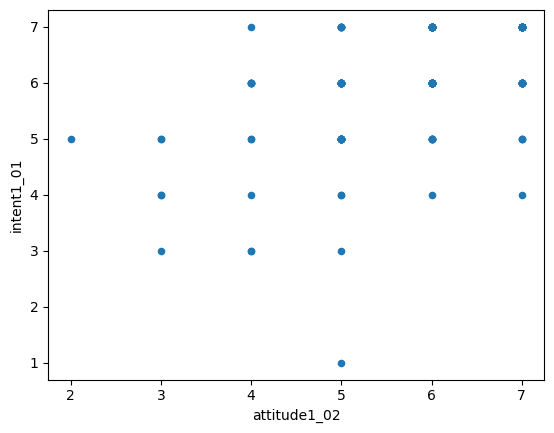

In [6]:
#Scatterplot with second variable.
ect_data.plot.scatter(x='attitude1_02', y='intent1_01')

<Axes: xlabel='attitude1_03', ylabel='intent1_01'>

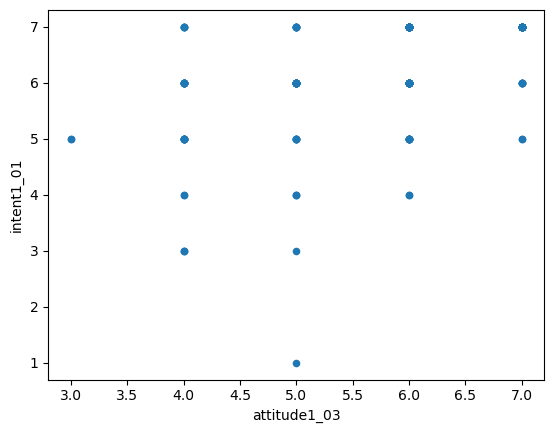

In [7]:
#Scatterplot with third variable.
ect_data.plot.scatter(x='attitude1_03', y='intent1_01')

<Axes: xlabel='attitude1_04', ylabel='intent1_01'>

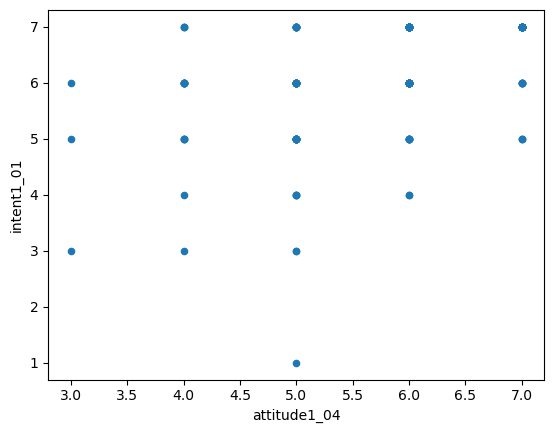

In [8]:
#Scatterplot with fourth variable.
ect_data.plot.scatter(x='attitude1_04', y='intent1_01')

<Axes: xlabel='satis01', ylabel='intent1_01'>

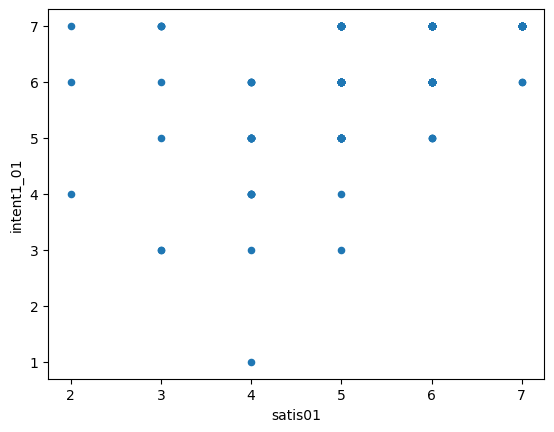

In [9]:
#Scatterplot with fifth variable.
ect_data.plot.scatter(x='satis01', y='intent1_01')

### Assessment of linearity

None of these look terribly linear to me, but maybe they are? I'm going to proceed on the assumption that they are so as to continue working on this assignment. 

## Assess the validity of the assumptions of collinearity...

In [14]:
# Use pearsonr() to calculate the correlation coefficient and pvalues for each independent variable against the target variable.
print(pearsonr(ect_data.attitude1_01, ect_data.intent1_01))
print(pearsonr(ect_data.attitude1_02, ect_data.intent1_01))
print(pearsonr(ect_data.attitude1_03, ect_data.intent1_01))
print(pearsonr(ect_data.attitude1_04, ect_data.intent1_01))
print(pearsonr(ect_data.satis01, ect_data.intent1_01))

PearsonRResult(statistic=0.6663562202246993, pvalue=3.6154224826027544e-27)
PearsonRResult(statistic=0.6036161039889795, pvalue=2.4408895712741707e-21)
PearsonRResult(statistic=0.519098567478697, pvalue=2.9068684515866345e-15)
PearsonRResult(statistic=0.5120316317108963, pvalue=7.907993696942252e-15)
PearsonRResult(statistic=0.545688440252472, pvalue=5.425059701904438e-17)


### Assessment of collinearity

I consulted ChatGPT for a plain language explanation of what these numbers mean (see reference). With that in mind, it seems there is a moderately strong correlation between each of our independent variables and the target variable. The p-values also indicate that these are highly statistically significant. 

Does the correlation coefficient also support the assumption of linearity?

## Assess the validity of the assumptions of homoscedasticity...

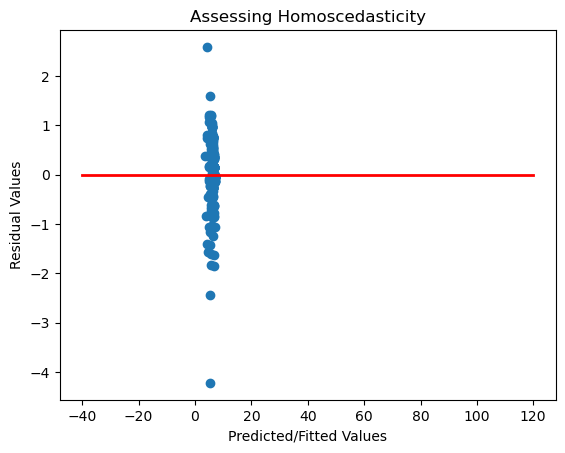

In [19]:
# Generatate a plot using the library statsmodels and its function ols().fit()
# Is this what builds the regression model?
lin_reg_1 = smf.ols('intent1_01 ~ attitude1_01 + attitude1_02 + attitude1_03 + attitude1_04 + satis01', ect_data).fit()

# assess homoscedasticity
plt.scatter(lin_reg_1.fittedvalues, lin_reg_1.resid)
plt.xlabel('Predicted/Fitted Values')
plt.ylabel('Residual Values')
plt.title('Assessing Homoscedasticity')
plt.plot([-40, 120],[0, 0], 'red', lw=2)   # add red horizontal line
plt.show()

### Assessment of homoscedasticity

Not knowing how to interprety that, I consulted ChatGPT (see reference). I asked what it meant that the results were arranged in an almost verticle line. It sugguested I do the following:

In [25]:
# Get the range, mean, std, etc., of the predicted values.
lin_reg_1.fittedvalues.describe()

count    201.000000
mean       6.199005
std        0.719223
min        3.628416
25%        5.824443
50%        6.242535
75%        6.845516
max        7.137073
dtype: float64

It replied that "Your fitted values are tightly clustered in a small range—about 3.5 units total. That’s why your scatterplot looks like a vertical line: the x-axis doesn’t have enough visual spread, so the points all bunch together." It further suggested that I widen th x axis as follows:

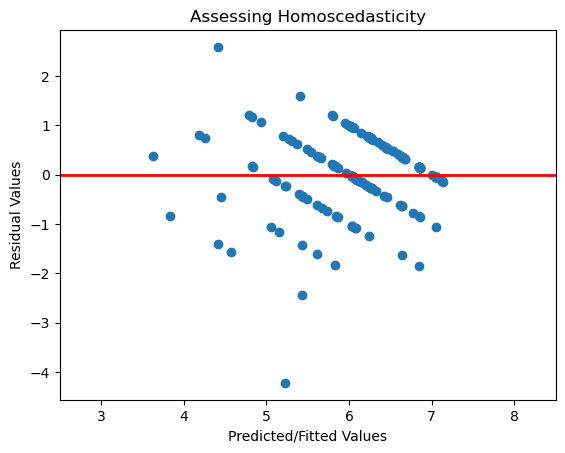

In [29]:
# assess homoscedasticity with ChatGPT's suggested changes to widen the x axis.
plt.scatter(lin_reg_1.fittedvalues, lin_reg_1.resid)
plt.xlabel('Predicted/Fitted Values')
plt.ylabel('Residual Values')
plt.title('Assessing Homoscedasticity')
plt.axhline(0, color='red', lw=2)
plt.xlim(2.5, 8.5)  # manually expand the range
plt.show()

Well, that certainly looks different! I played around with the xlim values to see how that affected the plot. That is super neat! ChatGPT tells me that the "residuals clearly show a funnel shape" and that "this is a classic sign of heteroscedasticity." So... yeah.

## Assess the validity of the assumptions of independence...

In [21]:
# Use .summary() to get the Durbin-Watson test statistic value. 
lin_reg_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             intent1_01   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     38.58
Date:                Wed, 23 Apr 2025   Prob (F-statistic):           1.99e-27
Time:                        10:19:36   Log-Likelihood:                -219.55
No. Observations:                 201   AIC:                             451.1
Df Residuals:                     195   BIC:                             470.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.3685      0.360      3.797      0.000       0.658       2.079
attitude1_01     0.4514      0.105      4.289      0.000       0.244       0.659
attitude1_02     0.1682      0.079      2.126      0.035       0.012       0.324
attitude1_03    -0.0656      0.103     -0.638      0.524      -0.268       0.137
attitude1_04     0.0489      0.103      0.477      0.634      -0.153       0.251
satis01          0.2094      0.058      3.624      0.000       0.095       0.323
==============================================================================
Omnibus:                       68.673   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              363.621
Skew:                          -1.191   Prob(JB):                     1.10e-79
Kurtosis:                       9.144   Cond. No.                         93.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Assessment of independence

The Durbin-Watson value is 1.947, so in the range of 1.5 to 2.5, which is acceptable. 

## Assess the validity of the assumptions of normality...

((array([-2.70235077, -2.39300644, -2.21670641, -2.09047253, -1.99075721,
         -1.90762425, -1.83590295, -1.77254445, -1.71559368, -1.66371874,
         -1.61596971, -1.57164427, -1.53020786, -1.49124379, -1.45442067,
         -1.41947039, -1.38617282, -1.35434495, -1.32383285, -1.29450578,
         -1.26625169, -1.2389738 , -1.21258791, -1.18702027, -1.1622059 ,
         -1.13808725, -1.11461308, -1.09173755, -1.06941949, -1.04762177,
         -1.02631079, -1.005456  , -0.98502958, -0.96500611, -0.94536226,
         -0.92607659, -0.90712937, -0.88850233, -0.87017859, -0.85214246,
         -0.83437937, -0.81687572, -0.79961884, -0.78259687, -0.76579869,
         -0.74921388, -0.73283263, -0.71664571, -0.70064443, -0.68482057,
         -0.66916635, -0.65367443, -0.63833783, -0.62314992, -0.60810442,
         -0.59319534, -0.57841696, -0.56376385, -0.5492308 , -0.53481284,
         -0.52050522, -0.50630336, -0.49220289, -0.47819962, -0.4642895 ,
         -0.45046865, -0.43673331, -0.

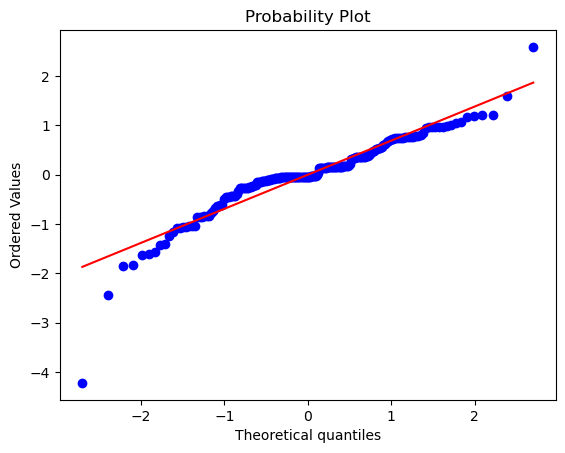

In [22]:
#Generate a QQ plot.
sts.probplot(lin_reg_1.resid, dist="norm", plot=plt)

### Assessment of normality

This looks mostly normal (that is, similar to the plot in the tutorial), but there are outliers on both ends. 

## Assess your model's F-test and T-tests. 

In [31]:
# Use .summary() again to see our F- and T-test results. 
lin_reg_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             intent1_01   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     38.58
Date:                Wed, 23 Apr 2025   Prob (F-statistic):           1.99e-27
Time:                        10:52:55   Log-Likelihood:                -219.55
No. Observations:                 201   AIC:                             451.1
Df Residuals:                     195   BIC:                             470.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.3685      0.360      3.797      0.000       0.658       2.079
attitude1_01     0.4514      0.105      4.289      0.000       0.244       0.659
attitude1_02     0.1682      0.079      2.126      0.035       0.012       0.324
attitude1_03    -0.0656      0.103     -0.638      0.524      -0.268       0.137
attitude1_04     0.0489      0.103      0.477      0.634      -0.153       0.251
satis01          0.2094      0.058      3.624      0.000       0.095       0.323
==============================================================================
Omnibus:                       68.673   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              363.621
Skew:                          -1.191   Prob(JB):                     1.10e-79
Kurtosis:                       9.144   Cond. No.                         93.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Assessment

F-Test:  
F(5, 195) = 38.58 (p < .0001)  

I believe this indicates that the overall model is significant! Ok, this is neat!  

T-tests:  
attitude1_01: t = 4.289 (p < .0001)  
attitude1_02: t = 2.126 (p = 0.035)  
attitude1_03: t = -0.638 (p = 0.524)  
attitude1_04: t = 0.477 (p = 0.634)  
satis01: t = 3.624 (p < .0001)  



#### Which variables are significant? Based on what assessment? 

I believe this means that attitude1_01, attitude1_02, and satis01 are all significant. This is based first on their p-values being less than 0.05. Based on the the t-tests, attitude1_01 has the most reliably predictive power at 4.289, followed by satis01 at 3.642 and attitude1_02 at 2.162. 

The remain variables - attitude1_03 and attitude1_04 - have p-values greater than 0.05 and low, in the case of attitude1_04, or negative, in the case of attitude1_03, t-value. 

#### Choose two significant variables. From a business perspective, why are they significant?

I choose attitude1_01 and satis01 as they seem to be the the most statistically significant based on p-value and most reliably predictive based on the t-tests. From a business perspective, I am guessing that they are significant becuase we can, with some reliability predict taht if they increase, then intent1_01 will increase as well. This means that effort put into increasing whatever those independent variable represent will result in an increase in our target variable. 

## Provide the equation for your model and interpret the results.

Using the explanation you provided to me:

intent1_01 = 1.3685 + 0.45 attitude1_01 + 0.17 attitude1_02 - 0.07 attitude1_03 + 0.05 attitude1_04 + 0.21 satis01  

So:  

If attitude1_01 increases by 1, intent1_01 will increase by 0.45.  
If attitude1_02 increases by 1, intent1_01 will increase by 0.17.  
If attitude1_03 increases by 1, intent1_01 will decrease by 0.07.  
If attitude1_04 increases by 1, intent1_01 will increase by 0.05.  
If satis01 increases by 1, intent1_01 will increase by 0.21.  

Right?  

Or, should I leave out attitude1_03 and attitude1_04 since their p-values indicated they were not significant and the t-test values were low?  

If that is the case, then:  

intent1_01 = 1.3685 + 0.45 attitude1_01 + 0.17 attitude1_02 + 0.21 satis01  

If attitude1_01 increases by 1, intent1_01 will increase by 0.45.  
If attitude1_02 increases by 1, intent1_01 will increase by 0.17.  
If satis01 increases by 1, intent1_01 will increase by 0.21.  


# References

This ChatGPT exchange was used to interpret the results of the Pearson test:  

<div><center><img src = "Assets/pearsonR_ChatGPT.png"></center></div>  



This exchange was used when assessing homoscedasticity:  

<div><center><img src = "Assets/homoscedasticity_ChatGPT.png"></center></div>  

And of course, your answers to my questions: 09_Supplement_TroyQs.pdf

[Open the PDF](Assets/09_Supplement_TroyQs.pdf)

